*AGEC 652 - Spring 2022*
# Structural estimation of a multi-agent model
## Discrete choice within Nash-Bertrand competition

## Agenda

We will return to the discrete choice model between car models A and B (PS1 and PS2) only this time without knowing the model parameters!

- You will estimate demand and supply models jointly using GMM
- Using estimated parameters, you will predict marginal costs
- Then, using marginal costs, you will quantify market power in this industry

## Research problem

Question: **How much market power do car brands A and B have?**

We have data from a random sample from $N=300$ local markets (indexed by $j$) for car models A and B
- Shares: $s_k$
- Prices: $p_k$
- Local steel prices: $t_k$
- Average local labor costs: $l_i$

We want to estimate the mean Lerner index for each firm
$$L_k = \frac{1}{N} \sum_{j=1}^N \frac{p_{k,j} - c_{k,j}}{p_{k,j}}$$

## Demand: theoretical model

In a given market, consumers have 3 options: 
- Buy one car of model a with price $p_a$
- Buy one car of model b with price $p_b$
- Not to buy a car, i.e., the outside option

If consumer $i$ buys car $k$, they get utility

$$u_{i,k} = \beta_0 -\alpha p_k + \beta_1 B^D_k + \beta_2 \xi^D_k + \nu_{ik} \equiv V_k + \nu_{ik}$$

where 
- $\alpha$ and $\beta$s are model parameters
- $B^D_k$ is a vector of **observed** product characteristics that consumers care about
- $\xi^D_k$ is a vector of **unobserved** product characteristics that consumers care about
- $\nu_{ik}$ is the (mean zero) idiosyncratic taste of consumer $i$ for product $k$
- $V_{k}$ is the mean utility for product $k$

If they do not buy a car, they get zero utility. Consumers are utility maximizers, so they pick the option that yields the highest utility.

## Demand: theoretical model

Assuming $\nu_{ik}$ is distributed in the population following a [Type I Extreme Value distribution](https://en.wikipedia.org/wiki/Gumbel_distribution), we can derive a closed-form expression for expected market shares of products a and b:

$$s_{a}=\frac{e^{V_a}}{1+e^{V_a}+e^{V_b}}, \; s_{b}=\frac{e^{V_b}}{1+e^{V_a}+e^{V_b}}$$

The demand for the outside option is given by $s_0 = 1 - s_A - s_B = \frac{1}{1+e^{V_a}+e^{V_b}}$

**Useful trick**. Note that $\frac{s_k}{s_0} = e^{V_k}$. Take logs on both sides:
$$\log(s_k)-\log(s_0) = V_k$$

## Demand: statistical model

$$\log(s_k)-\log(s_0) = V_k$$

The expression above refers to expected shares and does not fit the data exactly. For this reason, we add a idiosyncratic demand shock $\epsilon^D_{k,j}$ to obtain 

$$\log(s_{k,j})-\log(s_{0,j}) = V_{k,j} + \epsilon_{k,j} = \beta_0 -\alpha p_{k,j} + \beta_1 B^D_{k,j} + \beta_2 \xi^D_{k,j} + \epsilon^D_{k,j} \quad (1)$$

We assume $\epsilon^D_{k,j}$ has mean zero and is uncorrelated with $p_{k,j}$, $B^D_{k,j}$, and $\xi^D_{k,j}$

## Supply: theoretical model
Since this market is a duopoly, firms anticipate that their pricing decisions affect their demands mutually
- Firms then choose the price that maximizes their expected profits given the price their competitor has chosen: Bertrand competition

We assume that the outcome of this process is a Nash equilibrium: firms do the best they can given what others are doing and no firm has an incentive to unilaterally deviate
- Hence, each market is in a Nash-Bertrand equilibrium

Let $c_{k}$ be the constant marginal cost. Then in each market each firm solves:
$$\max_{p_{k}} \pi(p_k, p_{-k}) = p_{k} s_k(p_k, p_{-k}) - c_{k} s_k(p_k, p_{-k})$$  
The first-order condition is

$$
\partial\pi_k/\partial p_k = 0 \Rightarrow s_k(p_k, p_{-k}) + (p_k - c_k) \frac{\partial s_k(p_k, p_{-k})}{\partial p_k} = 0
$$

## Supply: theoretical model

Using the closed-form expression for the derivative $\frac{\partial s_k(p_k, p_{-k})}{\partial p_k} = -\alpha s_k (1-s_k)$, it follows that

$$
s_k(p_k, p_{-k}) - \alpha(p_k - c_k)s_k(p_k, p_{-k})(1-s_k(p_k, p_{-k})) = 0\\
c_k = p_k - \frac{1}{\alpha(1-s_k)}
$$

Thus, given parameter $\alpha$, we can calculate marginal costs that rationalize equilibrium prices and shares

## Supply: statistical model

With parameter estimate $\hat{\alpha}$ and using the expression for rationalized marginal costs based on the FOC, we can write predict expected marginal costs

$$
\hat{c}_{k,j} = p_{k,j} - \frac{1}{\hat{\alpha}(1-s_{k,j})} \quad (2)
$$

We parameterize marginal cost using observable input costs and add an idiosyncratic cost shock $\epsilon^S_{k,j}$ to accomodate for differences from the expectation
$$\hat{c}_{k,j} = \gamma_0 + \gamma_1 B^S_{k,j} + \gamma_2 t_{k,j} + \gamma_3 l_{k,j} + \gamma_4 \xi^S_k +\epsilon^S_{k,j} \quad (3)$$

where
- $\gamma$s are parameters to be estimated
- $t_{k,j}$ and $l_{k,j}$ are local input costs for steel and labor
- $B^S_k$ is a vector of **observed** product characteristics that affect costs
- $\xi^S_k$ is a vector of **unobserved** product characteristics that affect costs

We assume $\epsilon^S_{k,j}$ to be uncorrelated with$t_{k,j}$, $l_{k,j}$, $B^S_{k,j}$, and $\xi^S_k$

## Estimation: demand moment conditions

$$\log(s_{k,j})-\log(s_{0,j}) = \beta_0 -\alpha p_{k,j} + \beta_1 B^D_{k,j} + \beta_2 \xi^D_{k,j} + \epsilon^D_{k,j} \quad (1)$$

Do we have a problem to estimate this equation?

Very likely, YES! Unobserved product characteristics affect willingness to pay: $E[p_{k,j}\xi^D_{k,j}] \neq 0$

Since we can't include $\xi^D_{k,j}$, we have that $E[p_{k,j}(\beta_2 \xi^D_{k,j} + \epsilon^D_{k,j})] \neq 0 \Rightarrow$ ENDOGENEITY!

How can we solve this?

**With instruments**
- We can use input costs $t_{k,j}, l_{k,j}$ to instrument for price
- Key idea: with fixed product characteristics, higher costs lead to higher prices without affecting demand

## Estimation: demand moment conditions
So, we rewrite the demand estimating equation as

$$\log(s_{k,j})-\log(s_{0,j}) = \beta_0 -\alpha p_{k,j} + \beta_1 B^D_{k,j} + \epsilon^D_{k,j} = X^D_{k,j} \theta^D + \epsilon^D_{k,j} \quad (4)$$

where 
- $\theta^D$ is the parameter column vector $[\beta_0 \; -\alpha \; \beta_1]^T$
- $X^D$ is the row vector $[1 \; p_{k,j} \; B^D_{k,j}]$, with $B^D_{k,j}$ being a dummy variable receiving 1 for product b ($k=b$) or 0 otherwise
    - $B^D_{k,j}$ will pick up all the perceived product characteristics that are constant across markets


Denote the instrument vector $Z_{k,j} = [1 \; B^D_{k,j} \; t_{k,j} \; l_{k,j} ]$. Then, we can form moment conditions
$$E\left[Z^T_{k,j}\epsilon^D_{k,j}\right] = 0$$

Q: How many moment conditions do we have here?

## Estimation: demand moment conditions

A: We have **four moment** conditions from the demand side

$$
E\left[\epsilon^D_{k,j}\right] = 0\\
E\left[B^D_{k,j}\epsilon^D_{k,j}\right] = 0\\
E\left[t_{k,j}\epsilon^D_{k,j}\right] = 0\\
E\left[l_{k,j}\epsilon^D_{k,j}\right] = 0
$$

## Estimation: supply moment conditions

$$\hat{c}_{k,j} = \gamma_0 + \gamma_1 B^S_{k,j} + \gamma_2 t_{k,j} + \gamma_3 l_{k,j} + \gamma_4 \xi^S_k +\epsilon^S_{k,j} \quad (3)$$

Again, we have unobserved characteristics that affect cost. However, endogeneity is less of a concern here if we consider this sector to be a small part of the economy:
- Prices for steel and labor clear on much bigger markets, thus decisions of product characteristics are unlikely to affect their prices

For this reason, we can more reasonably assume that $E[t_{k,j}\epsilon^S_{k,j}]=0$, $E[l_{k,j}\epsilon^S_{k,j}]=0$, and $E[B^S_{k,j}\epsilon^S_{k,j}]=0$

## Estimation: supply moment conditions

So we rewrite our supply estimating equation as

$$\hat{c}_{k,j} = \gamma_0 + \gamma_1 B^S_{k,j} + \gamma_2 t_{k,j} + \gamma_3 l_{k,j} + \epsilon^S_{k,j} = \theta^S X^S_{k,j} + \epsilon^S_{k,j} \quad (5)$$

where 
- $\theta^S$ is the parameter column vector $[\gamma_0 \; \gamma_1 \; \gamma_2 \; \gamma_3]^T$
- $X^S$ is the row vector $[1 \; B^S_{k,j} \;t_{k,j} \;l_{k,j}]$, with $B^S_{k,j}$ being a dummy variable receiving 1 for product b ($k=b$) or 0 otherwise

Since $X^S$ are instruments for themselves (and note that $X^S_{k,j} = Z_{k,j}$, we can construct supply moment conditions
$$E\left[Z^T_{k,j}\epsilon^S_{k,j}\right] = 0$$

Q: How many moment conditions do we have here?

## Estimation: demand moment conditions

A: Again, we have **four moment** conditions, now from the supply side

$$
E\left[\epsilon^S_{k,j}\right] = 0\\
E\left[B^S_{k,j}\epsilon^S_{k,j}\right] = 0\\
E\left[t_{k,j}\epsilon^S_{k,j}\right] = 0\\
E\left[l_{k,j}\epsilon^S_{k,j}\right] = 0
$$

## Your turn!

Enough talk, let's work! The data for this exercise are in file `shares_data.csv`

1. Using these 8 moment conditions, joinly estimate parameter vector $\theta = [\theta^D, \theta^S]$ with GMM
2. Using your estimate $\hat{\alpha}$, predict marginal costs (equation 2) and calculate the average Lerner index for each model: $\hat{L}_k = \frac{1}{N} \sum_{j=1}^N \frac{p_{k,j} - \hat{c}_{k,j}}{p_{k,j}}$

Here are a few steps to get you started

## Loading and preparing the data

In [2]:
using DataFrames, CSV
df = CSV.read("shares_data.csv", DataFrame)

,MarketID,s_k,p_k,s_0,steel,labor,product
,Int64,Float64,Float64,Float64,Float64,Float64,String1
1,1,0.0485396,33.96,0.878173,8.95,20.68,a
2,1,0.0732874,33.53,0.878173,8.95,20.68,b
3,2,0.0492018,34.06,0.866904,8.45,22.02,a
4,2,0.0838941,33.18,0.866904,8.45,22.02,b
5,3,0.0566908,33.2689,0.850551,7.43,21.96,a
6,3,0.0927581,33.6889,0.850551,7.43,21.96,b
7,4,0.0590058,33.8089,0.858772,7.93,21.73,a
8,4,0.0822226,33.5989,0.858772,7.93,21.73,b
9,5,0.0742836,31.94,0.831041,7.61,21.9,a


## Loading and preparing the data

This data set already includes $s_0$ calculated for you. Let's get $N$ and generate
- $log(s_{k,j}) - log(s_{0,j})$
- $B_{k,j}$

In [3]:
N = nrow(df)
df.logsk_logs0 = log.(df.s_k) - log.(df.s_0);
df.is_B = (df.product .== "b");b
df

,MarketID,s_k,p_k,s_0,steel,labor,product,logsk_logs0
,Int64,Float64,Float64,Float64,Float64,Float64,String1,Float64
1,1,0.0485396,33.96,0.878173,8.95,20.68,a,-2.89546
2,1,0.0732874,33.53,0.878173,8.95,20.68,b,-2.48346
3,2,0.0492018,34.06,0.866904,8.45,22.02,a,-2.869
4,2,0.0838941,33.18,0.866904,8.45,22.02,b,-2.33537
5,3,0.0566908,33.2689,0.850551,7.43,21.96,a,-2.70827
6,3,0.0927581,33.6889,0.850551,7.43,21.96,b,-2.21589
7,4,0.0590058,33.8089,0.858772,7.93,21.73,a,-2.67787
8,4,0.0822226,33.5989,0.858772,7.93,21.73,b,-2.34607
9,5,0.0742836,31.94,0.831041,7.61,21.9,a,-2.41479


## Loading and preparing the data

It might also be useful to prepare matrices $X$ and $Z$

In [4]:
X = [ones(N) df.p_k df.is_B];
Z = [ones(N) df.is_B df.steel df.labor];

## Moment conditions function

Program function `g_i(theta)` that receives parameter vector $\theta$ and returns the eight moment conditions for all observations ($N \times 8$ matrix). Here is a way to structure it

In [12]:
function g_i(theta::AbstractVector{T}) where T
    # DEMAND SIDE
    theta_d = theta[1:3] # demand parameters
    # Epsilons for demand side
    e_d = df.logsk_logs0 - (X * theta_d) 
    # Moment conditions for demand side
    m_di = Z .* e_d

    # SUPPLY SIDE
    # Costs
    alpha = -theta[2] # we need it to recover costs
    c_k = df.p_k - 1/alpha .* 1 ./(1 .- df.s_k)

    theta_s = theta[4:7] # supply parameters
    # Epsilons for supply side
    e_s = c_k - (Z * theta_s)
    # Moment conditions for supply side
    m_si = Z .* e_s
  
    # Return matrices side by side (N x M)
    return([m_di m_si])
end

g_i (generic function with 2 methods)

## GMM estimation

With function `g_i(theta)`, you can use `Optim` package to minimize objective function `Q(theta)` 

In [16]:
using LinearAlgebra
M = 8
W = I(M) # Identity Matrix
function Q(theta)
    # Get moment vectors
    m_i = g_i(theta)
    # Take means of each column
    G = [sum(m_i[:, k]) for k in 1:M] ./ N
    # Calculate Q    
    G' * W * G
end

Q (generic function with 1 method)

## GMM estimation
- For the first step, use $W$ as the identity matrix and find estimate `theta_1`
- For the second step, $\hat{W}=(\hat{S})^{-1}$. So, you will need to calculate 
$$\hat{S} = E[g_i(\hat{\theta}_1)^T g_i(\hat{\theta}_1)]$$

## GMM estimation: initial guess

Given the dimensionality of the problem it's a good idea to start with a reasonable initial guess 
- Let's use OLS to get an initial guess for $\theta^D$. For $theta^S$
- Let's guess $\gamma_0$ as the minimum price and set 0.1 for the other parameters (we expect them to be positive)

In [21]:
using GLM
ols_reg = lm(@formula(logsk_logs0 ~ 1 + p_k + is_B), df)
theta_0 = [coef(ols_reg); minimum(df.p_k); ones(3)./10]

7-element Vector{Float64}:
  0.31506305791863387
 -0.09284587690236082
  0.3630065729084654
 30.53116385673067
  0.1
  0.1
  0.1

## GMM estimation: first step

In [22]:
# Step 1
using Optim
res = Optim.optimize(Q, theta_0, Newton(), Optim.Options(f_abstol=1e-10, g_abstol=0.0, g_reltol=0.0))
theta_1 =  res.minimizer

7-element Vector{Float64}:
  1.3158792218053876
 -0.1227925330453188
  0.3726029375673564
  6.900381196982154
  0.15413172114544826
  0.9851381306701129
  0.4545809359845973

In [23]:
# Calculate W_hat
W = inv(g_i(theta_1)'  * g_i(theta_1) ./N)

8×8 Matrix{Float64}:
 22264.1       -9.35407   -315.764     …  -40.5982    -1.73266    22.4992
    -9.35407  139.508       -6.3351        -5.44032    0.276179    0.435617
  -315.764     -6.3351      34.9938         1.64374   -0.622251    0.197189
  -893.501     -0.556636     1.82094        1.24647    0.298699   -1.09837
  -471.875    -11.733        0.252148       2.28313   -5.31541   -29.8712
   -40.5982    -5.44032      1.64374   …    5.88707   -0.148898   -0.166376
    -1.73266    0.276179    -0.622251      -0.148898   1.24944    -0.185537
    22.4992     0.435617     0.197189      -0.166376  -0.185537    1.43412

## GMM estimation: second step

In [24]:
# Use step 1 estimates as initial guess
res = Optim.optimize(Q, theta_1, Newton(), Optim.Options(f_abstol=1e-10, g_abstol=0.0, g_reltol=0.0))
theta_GMM =  res.minimizer

7-element Vector{Float64}:
  1.0199245194125766
 -0.11397811386316062
  0.37100733799451974
  6.290180220906779
  0.1402047656897224
  0.9924696457995701
  0.4493297091730602

## Marginal cost estimation
Now that we have estimated all model parameters, we can pick $\alpha$ to calculate implied marginal costs

In [31]:
alpha_hat = -theta_GMM[2]
df.c_k = df.p_k - 1/alpha_hat .* 1 ./(1 .- df.s_k)

600-element Vector{Float64}:
 24.738792210609063
 24.06254067781358
 24.83237010187434
 23.602925664463477
 23.968041341328448
 24.018285525999524
 24.48508622304874
 24.039224484125405
 22.46235183880002
 23.228879434070436
 23.350630535316768
 23.30902392456632
 23.203812606117665
  ⋮
 24.436212820379843
 25.19680474096515
 23.105762253313976
 24.452288470657827
 24.970821319174792
 24.684052594724506
 23.573038799628016
 23.753229910957423
 23.030240361987897
 23.292267775375095
 23.255255176304644
 23.95603926067671

## Marginal cost estimation
Let's take a look at the distribution of costs per firm

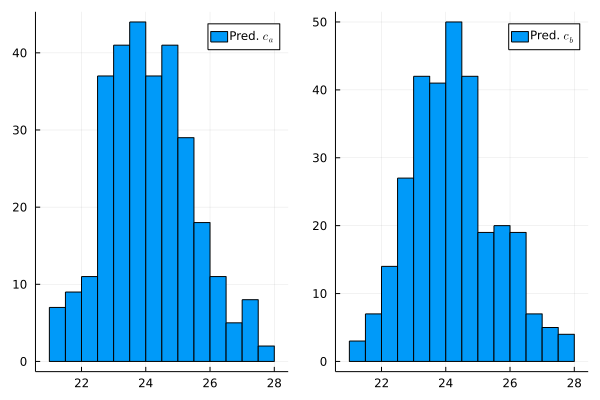

In [32]:
using Plots, LaTeXStrings
plot(histogram(df.c_k[.!df.is_B], label=L"Pred. $c_a$", bins=30), histogram(df.c_k[df.is_B], label=L"Pred. $c_b$", bins=30))

## Lerner index
We are now ready to calculate the average Lerner index per firm

In [36]:
df.lerner_k = (df.p_k - df.c_k) ./ df.p_k;
# Firm A
sum(df.lerner_k[.!df.is_B])./(N/2)

0.27851758693518636

In [37]:
# Firm B
sum(df.lerner_k[df.is_B])./(N/2)

0.28187349247237525

So about 28% of the price is due to market power
- Firm B has slightly higher market power due to its perceived higher quality ($\beta_1 = 0.37 > 0$)